## Introduction

It can be said that in any country, felonies are common no matter how developed or rich a country is. Criminals are subjected to the punishment that they are due. While reforming a society, correction facilities with proper guidelines are necessary. The Texas Department of Criminal Justice (TDCJ) looks after inmates in state prisons, state jails, and private prisons that work with the TDCJ. It is in charge of making sure that inmates who are released from prison on parole or mandatory supervision are being properly watched. My objective is to predict the parole decision for an inmate based on age, projected release date, Maximum Sentence, Race, Sentence date, Gender and Offence.

## Objective: 
To predict Parole acceptance with the data based on sentence type, age, Gender, Offence, Race, Sentence 

## Dataset Description:
This is a dataset that has onhand inmate population with relevent demographic offence and parol information from texas department of crimal justice. 

### Dataset Link: https://data.texas.gov/dataset/High-Value-Dataset-January-2022/y6p5-x3b9

### Columns in Dataset:

#### SID Number :
State Identification number that has been assigned to an individual whose fingerprints have been recorded. 
#### TDCJ Number:
A number provided by Texas Department of Criminal Justice to keep track of inmates housed in their jails by their loved ones. 
#### Name:
Name of the inmates 
#### Current Facility:
Facility where an inmates is housed by TDCJ
#### Gender:
Gender of inmate
#### Race:
Race of inmate
#### Age:
Age of inmate
#### Projected Release: 
Projected Date on which the inmate could be released
#### Maximum Sentence Date:
The date until when an individual is supposed to be in the jail as decided by court of law
#### Parole Eligibility Date:
Date when an individual can apply for his parole
#### Case Number:
An unique number that is assigned to a case
#### County:
Area where the crime took place
#### Offense Code:
An unique identifier with which police identifies the crime 
#### TDCJ Offense:
Description of offense
#### Sentence Date:
Date on which an inmate was sentenced to jail by the court of law
#### Offense Date:
Date when the offense/crime took place
#### Sentenced (Years):
Number of years an inmate has been sentenced to stay in jail
#### Last Parole Decision:
Latest parole decision for an inmate
#### Next Parole Review Date:
Immediate date of parole review 
#### Parole Review Status:
States if a parole has been accepted or denied 

## Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Loading data from csv file

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Likhith1702/Data_602/main/High_Value_Dataset__January_2022%20(1).csv')

In [3]:
df.head()

,SID Number,TDCJ Number,Name,Current Facility,Gender,Race,Age,Projected Release,Maximum Sentence Date,Parole Eligibility Date,Case Number,County,Offense Code,TDCJ Offense,Sentence Date,Offense Date,Sentence (Years),Last Parole Decision,Next Parole Review Date,Parole Review Status
0,524524,758486,"HARPER,DAVID JOHN JR",Estelle,M,W,93,01/01/9999,01/01/9999,08/03/2026,95-765-C,McLennan,11180000,AGG SEXUAL ASSAULT,08/13/1996,09/15/1995,Life,None,08/03/2026,NOT IN REVIEW PROCESS
1,703267,841623,"RODRIGUEZ,THEODORE",Hospital Galveston,M,W,84,02/01/2022,08/03/2043,02/01/2021,97-396-C,McLennan,11990003,AGG SEX ASLT,08/05/1998,06/01/1996,45.0,Approved on 08/18/2021,NaN,NOT IN REVIEW PROCESS
2,770626,449674,"FLORES,ISABEL",Pack,M,H,84,01/01/9999,01/01/9999,09/02/2006,86CR-1234-B,Nueces,9150000,MURDER W/DEADLY WPN,04/13/1987,09/02/1986,Life,Denied on 07/21/2021,07/2024,NOT IN REVIEW PROCESS
3,771601,1491019,"MOLETT,JOHN HENRY",Pack,M,B,79,12/02/2037,12/02/2037,12/02/2022,1144294,Harris,12990002,AGG ROBBERY W/DW,02/21/2008,12/03/2007,30.0,None,12/02/2022,NOT IN REVIEW PROCESS
4,779423,1241039,"CARAWAY,LEON JR",C.T. Terrell,M,B,84,06/19/2023,06/19/2023,06/18/2013,"04CR-16,149",Shelby,11990003,AGG SEXUAL ALST,05/13/2004,07/24/1999,20.0,Denied on 10/30/2019,09/2022,NOT IN REVIEW PROCESS


In [4]:
print("Rows and Columns:",df.shape)

Rows and Columns: (118733, 20)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118733 entries, 0 to 118732
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   SID Number               118733 non-null  int64 
 1   TDCJ Number              118733 non-null  int64 
 2   Name                     118733 non-null  object
 3   Current Facility         118733 non-null  object
 4   Gender                   118733 non-null  object
 5   Race                     118733 non-null  object
 6   Age                      118733 non-null  int64 
 7   Projected Release        118714 non-null  object
 8   Maximum Sentence Date    118489 non-null  object
 9   Parole Eligibility Date  108421 non-null  object
 10  Case Number              118671 non-null  object
 11  County                   118733 non-null  object
 12  Offense Code             118733 non-null  int64 
 13  TDCJ Offense             118733 non-null  object
 14  Sentence Date       

In [6]:
df.isnull().sum()

SID Number                     0
TDCJ Number                    0
Name                           0
Current Facility               0
Gender                         0
Race                           0
Age                            0
Projected Release             19
Maximum Sentence Date        244
Parole Eligibility Date    10312
Case Number                   62
County                         0
Offense Code                   0
TDCJ Offense                   0
Sentence Date               2426
Offense Date                   0
Sentence (Years)               1
Last Parole Decision        9267
Next Parole Review Date    23073
Parole Review Status        9267
dtype: int64

In [7]:
df.columns

Index(['SID Number', 'TDCJ Number', 'Name', 'Current Facility', 'Gender',
       'Race', 'Age', 'Projected Release', 'Maximum Sentence Date',
       'Parole Eligibility Date', 'Case Number', 'County', 'Offense Code',
       'TDCJ Offense', 'Sentence Date', 'Offense Date', 'Sentence (Years)',
       'Last Parole Decision', 'Next Parole Review Date',
       'Parole Review Status'],
      dtype='object')

## Creating a new dataframe to clean the data

### Dropping the following columns:
#### SID Number, Name, Case Number, Next Parole Review Date

As these are not needed in our analysis we will be dropping them and creating an new data set for further processing of data. This will give us a clear picture of our variables.

In [8]:
dff = df.drop(columns=['TDCJ Number','SID Number','Name','Case Number','Next Parole Review Date'])
dff.columns

Index(['Current Facility', 'Gender', 'Race', 'Age', 'Projected Release',
       'Maximum Sentence Date', 'Parole Eligibility Date', 'County',
       'Offense Code', 'TDCJ Offense', 'Sentence Date', 'Offense Date',
       'Sentence (Years)', 'Last Parole Decision', 'Parole Review Status'],
      dtype='object')

### Dropping NaN values from the following columns: 
#### Parole Eligibility Date, Last Parole Decision, Parole Review Status, Maximum Sentence Date

These coloumns have NaN values that hamper our analysis so we are dropping them to make the data cleaner to work with. with regards to Parole Eligibility Data, NaN come as one is not decided for a perticular person, hence we are making it as "None" the same with regards to Last Parole decision, if it is not approved or denied we will be making the same as none for further analysis. So with the Parole Review status. 

In [9]:
dff = dff.dropna(subset = ['Parole Eligibility Date','Last Parole Decision', 'Parole Review Status','Maximum Sentence Date'])

In [10]:
dff.head()

,Current Facility,Gender,Race,Age,Projected Release,Maximum Sentence Date,Parole Eligibility Date,County,Offense Code,TDCJ Offense,Sentence Date,Offense Date,Sentence (Years),Last Parole Decision,Parole Review Status
0,Estelle,M,W,93,01/01/9999,01/01/9999,08/03/2026,McLennan,11180000,AGG SEXUAL ASSAULT,08/13/1996,09/15/1995,Life,None,NOT IN REVIEW PROCESS
1,Hospital Galveston,M,W,84,02/01/2022,08/03/2043,02/01/2021,McLennan,11990003,AGG SEX ASLT,08/05/1998,06/01/1996,45.0,Approved on 08/18/2021,NOT IN REVIEW PROCESS
2,Pack,M,H,84,01/01/9999,01/01/9999,09/02/2006,Nueces,9150000,MURDER W/DEADLY WPN,04/13/1987,09/02/1986,Life,Denied on 07/21/2021,NOT IN REVIEW PROCESS
3,Pack,M,B,79,12/02/2037,12/02/2037,12/02/2022,Harris,12990002,AGG ROBBERY W/DW,02/21/2008,12/03/2007,30.0,None,NOT IN REVIEW PROCESS
4,C.T. Terrell,M,B,84,06/19/2023,06/19/2023,06/18/2013,Shelby,11990003,AGG SEXUAL ALST,05/13/2004,07/24/1999,20.0,Denied on 10/30/2019,NOT IN REVIEW PROCESS


### Replacing 'Life' in 'Sentence (Years)' column with 110

To make the data consistent we are changing the text that is there as "Life", "Capital Life" to numerical. I chose a random number 110 and replacing this with that text in the coloum. To make the column consistent and numerical as that can be used in efficienty way for further analysis. 

In [11]:
dff['Sentence (Years)'] = dff['Sentence (Years)'].replace(['Life','Capital Life'],110)

### Splitting 'Last Parole Decision' column into 'Parole_Decision' and 'Parole_Decision_Date' columns. 
To understand when a person got his parole approved and denied we are splitting this in to two coloumns as "Parole_Decision" when shows us if they got it approved or denied. While the coloumn "Parole_Decision_Data" will give us the date when it happened. If a Parole decision is "None" the same will reflect on the Parole_decision_Date coloumn as well.

In [12]:
dff[['Parole_Decision','Parole_Decision_Date']]= dff['Last Parole Decision'].str.split(' on',expand=True)

In [13]:
dff['Parole_Decision_Date']= pd.to_datetime(dff['Parole_Decision_Date'])
dff['Decision_Year'] = dff['Parole_Decision_Date'].dt.year
dff['Decision_Month'] = dff['Parole_Decision_Date'].dt.month
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105951 entries, 0 to 118730
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Current Facility         105951 non-null  object        
 1   Gender                   105951 non-null  object        
 2   Race                     105951 non-null  object        
 3   Age                      105951 non-null  int64         
 4   Projected Release        105951 non-null  object        
 5   Maximum Sentence Date    105951 non-null  object        
 6   Parole Eligibility Date  105951 non-null  object        
 7   County                   105951 non-null  object        
 8   Offense Code             105951 non-null  int64         
 9   TDCJ Offense             105951 non-null  object        
 10  Sentence Date            105951 non-null  object        
 11  Offense Date             105951 non-null  object        
 12  Sentence (Years)

In [14]:
dff.head()

,Current Facility,Gender,Race,Age,Projected Release,Maximum Sentence Date,Parole Eligibility Date,County,Offense Code,TDCJ Offense,Sentence Date,Offense Date,Sentence (Years),Last Parole Decision,Parole Review Status,Parole_Decision,Parole_Decision_Date,Decision_Year,Decision_Month
0,Estelle,M,W,93,01/01/9999,01/01/9999,08/03/2026,McLennan,11180000,AGG SEXUAL ASSAULT,08/13/1996,09/15/1995,110,None,NOT IN REVIEW PROCESS,None,NaT,NaN,NaN
1,Hospital Galveston,M,W,84,02/01/2022,08/03/2043,02/01/2021,McLennan,11990003,AGG SEX ASLT,08/05/1998,06/01/1996,45.0,Approved on 08/18/2021,NOT IN REVIEW PROCESS,Approved,2021-08-18,2021.0,8.0
2,Pack,M,H,84,01/01/9999,01/01/9999,09/02/2006,Nueces,9150000,MURDER W/DEADLY WPN,04/13/1987,09/02/1986,110,Denied on 07/21/2021,NOT IN REVIEW PROCESS,Denied,2021-07-21,2021.0,7.0
3,Pack,M,B,79,12/02/2037,12/02/2037,12/02/2022,Harris,12990002,AGG ROBBERY W/DW,02/21/2008,12/03/2007,30.0,None,NOT IN REVIEW PROCESS,None,NaT,NaN,NaN
4,C.T. Terrell,M,B,84,06/19/2023,06/19/2023,06/18/2013,Shelby,11990003,AGG SEXUAL ALST,05/13/2004,07/24/1999,20.0,Denied on 10/30/2019,NOT IN REVIEW PROCESS,Denied,2019-10-30,2019.0,10.0


In [15]:
dff.isna().sum()

Current Facility               0
Gender                         0
Race                           0
Age                            0
Projected Release              0
Maximum Sentence Date          0
Parole Eligibility Date        0
County                         0
Offense Code                   0
TDCJ Offense                   0
Sentence Date                  0
Offense Date                   0
Sentence (Years)               0
Last Parole Decision           0
Parole Review Status           0
Parole_Decision                0
Parole_Decision_Date       45474
Decision_Year              45474
Decision_Month             45474
dtype: int64

In [16]:
dff = dff.dropna(subset = ['Parole_Decision_Date','Decision_Year', 'Decision_Month'])

### Removing all null values in each of the columns 

In [17]:
dff.isna().sum()

Current Facility           0
Gender                     0
Race                       0
Age                        0
Projected Release          0
Maximum Sentence Date      0
Parole Eligibility Date    0
County                     0
Offense Code               0
TDCJ Offense               0
Sentence Date              0
Offense Date               0
Sentence (Years)           0
Last Parole Decision       0
Parole Review Status       0
Parole_Decision            0
Parole_Decision_Date       0
Decision_Year              0
Decision_Month             0
dtype: int64

> This is the dataset ('dff') that will be used for EDA after cleaning the original dataset

## Exploratory Data Analysis:

### Top 10 offenses in Texas:

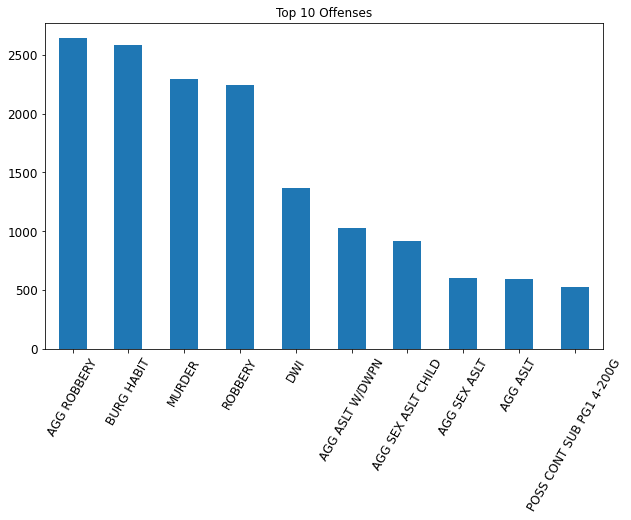

In [18]:
dff['TDCJ Offense'].value_counts().head(10).plot(kind='bar',title='Top 10 Offenses',fontsize=12, figsize=(10,6))
plt.xticks(rotation=60)
plt.show(close=None, block=None)

> As per the plot we can see that from the data we have "Murder" tops the list while "Robbery" takes the second place and Sexual assult on minors comes at last. 

### Top facilities in which inmates are housed:

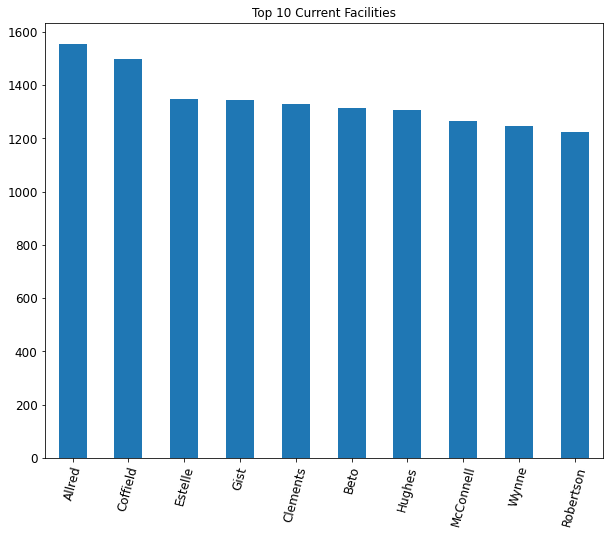

In [19]:
dff['Current Facility'].value_counts().head(10).plot(kind='bar',title='Top 10 Current Facilities',fontsize=12, figsize=(10,8))
plt.xticks(rotation=75)
plt.show(close=None, block=None)

### Unsafe counties as per data in Texas:

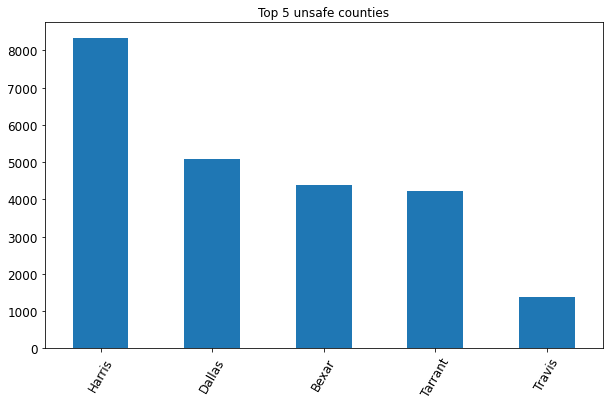

In [20]:
dff['County'].value_counts().head().plot(kind='bar',title='Top 5 unsafe counties',fontsize=12, figsize=(10,6))
plt.xticks(rotation=60)
plt.show(close=None, block=None)

### Count of Approved and Denied parole decisions:

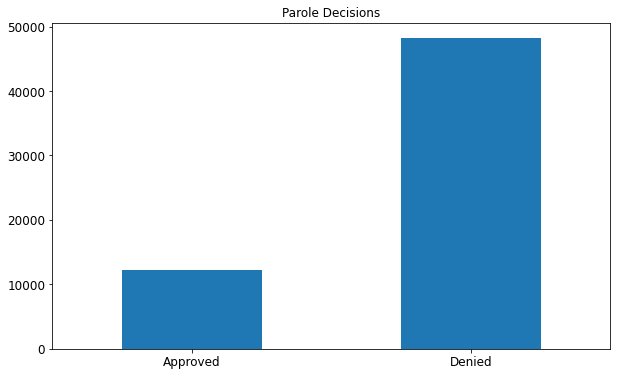

In [21]:
dff['Parole_Decision'].value_counts().sort_index().plot(kind='bar',title='Parole Decisions',fontsize=12, figsize=(10,6))
plt.xticks(rotation=0)
plt.show(close=None, block=None)

In [22]:
x= dff['Parole_Decision'].value_counts()
x

Denied      48195
Approved    12282
Name: Parole_Decision, dtype: int64

### Acceptance and denial frequency of parole based on Age:

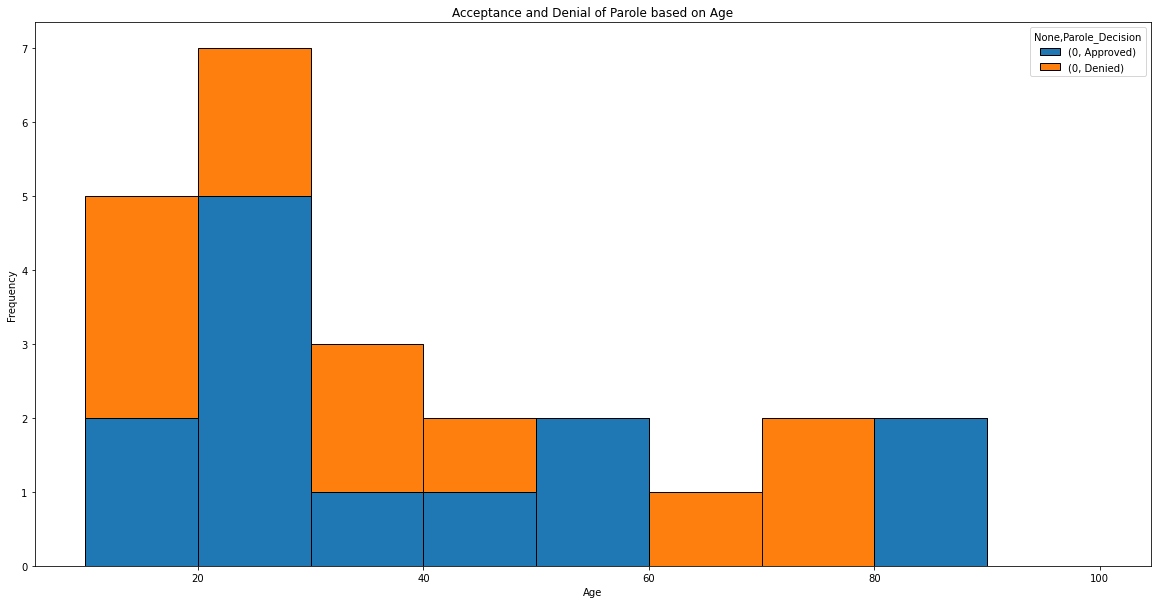

In [23]:
Parole_Age=dff.groupby(['Age','Parole_Decision']).size().to_frame()
bins = (10, 20, 30, 40, 50, 60, 70, 80, 90, 100)
Parole_Age.unstack().plot(kind='hist',edgecolor='k',stacked=True,figsize=(20,10), bins= bins)
plt.title('Acceptance and Denial of Parole based on Age')
plt.xlabel('Age')
plt.show()

> Most approved paroles are given for people aged between 20-30. Also, people who are aged between 60-80 have no approval paroles.

### Acceptance and denial frequency of parole based on sentence years:

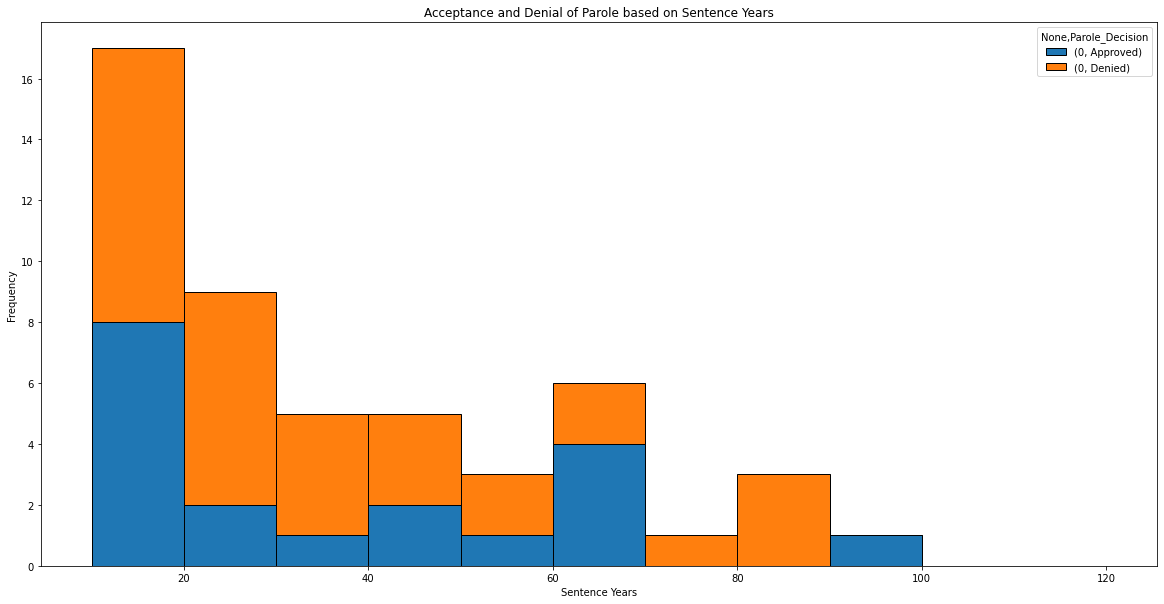

In [24]:
Sentence_Years=dff.groupby(['Sentence (Years)','Parole_Decision']).size().to_frame()
bins = (10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110,120)
Sentence_Years.unstack().plot(kind='hist',edgecolor='k',stacked=True,figsize=(20,10), bins=bins)
plt.title('Acceptance and Denial of Parole based on Sentence Years')
plt.xlabel('Sentence Years')
plt.show()

> People who are sentenced between 10-20 years have maximum parole approvals also maximum parole denials.

### Parole decisions based on Gender and Race:

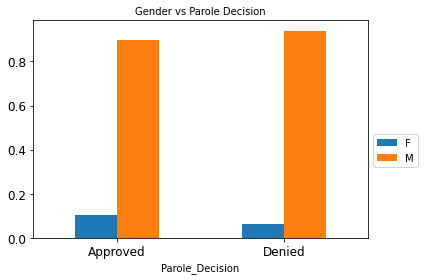

In [25]:
df_cross=pd.crosstab(dff['Parole_Decision'],dff['Gender'])
df_cross.div(df_cross.sum(1).astype(float), axis = 0).plot.bar(stacked = False)
plt.title('Gender vs Parole Decision', fontweight = 10, fontsize = 10)
plt.legend(bbox_to_anchor=(1,0.5),)
plt.xticks(rotation = 0,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

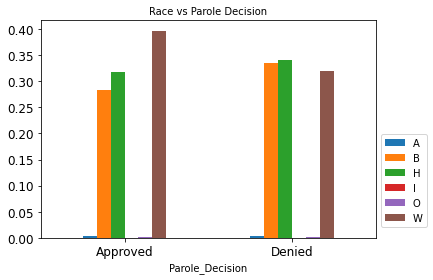

In [26]:
df_cross=pd.crosstab(dff['Parole_Decision'],dff['Race'])
df_cross.div(df_cross.sum(1).astype(float), axis = 0).plot.bar(stacked = False)
plt.title('Race vs Parole Decision', fontweight = 10, fontsize = 10)
plt.legend(bbox_to_anchor=(1,0.5),)
plt.xticks(rotation = 0,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [27]:
paroles_by_year=dff.groupby(['Parole_Decision','Decision_Year','Decision_Month']).size().to_frame()
paroles_by_year=paroles_by_year.rename(columns={0: "Count of Paroles"})
paroles_by_year=paroles_by_year.reset_index()

In [28]:
paroles_by_year

,Parole_Decision,Decision_Year,Decision_Month,Count of Paroles
0,Approved,2018.0,3.0,1
1,Approved,2019.0,6.0,2
2,Approved,2019.0,7.0,1
3,Approved,2019.0,8.0,2
4,Approved,2019.0,9.0,5
...,...,...,...,...
306,Denied,2021.0,9.0,3115
307,Denied,2021.0,10.0,3237
308,Denied,2021.0,11.0,3208
309,Denied,2021.0,12.0,2795


### Count of approved and denied paroles by year:

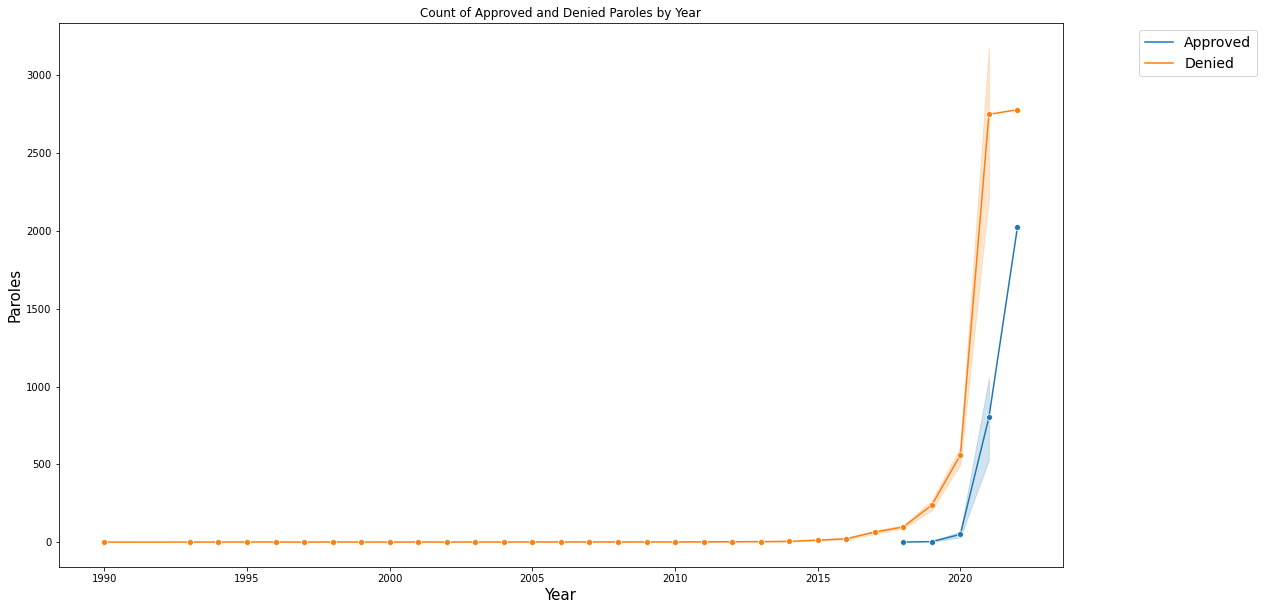

In [29]:
plt.figure(figsize=(18,10))
plot = sns.lineplot(x=paroles_by_year['Decision_Year'],y=paroles_by_year['Count of Paroles'],hue=paroles_by_year["Parole_Decision"],marker='o', data=paroles_by_year)
plot.legend(loc='upper right', bbox_to_anchor=(1.2, 1),fontsize=14)
plt.title('Count of Approved and Denied Paroles by Year')
plt.xlabel("Year", size=15)
plt.ylabel("Paroles", size=15)
plt.show()

> This line plot shows the relation between number of paroles accepted and denied throughout the years.

# Modeling and Classification

### Preparing date for train and test split

> Importing required libraries and creating pipelines

In [31]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")
import numpy as np

cat_vars = ['Gender','Race', 'County', 'TDCJ Offense', 'Offense Code',]
num_vars = ['Sentence (Years)', 'Decision_Year', 'Decision_Month', 'Age']

num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                         ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_vars),
                                                      ('create_dummies', cat_pipeline, cat_vars)])

print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['Sentence (Years)', 'Decision_Year',
                                  'Decision_Month', 'Age']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['Gender', 'Race', 'County', 'TDC

> Splitting the dataset into test and train datasets 

In [32]:
from sklearn.model_selection import train_test_split
features = [x for x in dff.columns if (x != 'Parole_Decision')]

X = dff[features]
y = dff['Parole_Decision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)

print(f'Training data: {X_train.shape[0]:,}')
print(f'Test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Training data: 48,381
Test data: 12,096

Features:
Current Facility
Gender
Race
Age
Projected Release
Maximum Sentence Date
Parole Eligibility Date
County
Offense Code
TDCJ Offense
Sentence Date
Offense Date
Sentence (Years)
Last Parole Decision
Parole Review Status
Parole_Decision_Date
Decision_Year
Decision_Month


# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

lr_p = Pipeline([('processing pipeline', processing_pipeline), 
              ('LR', LogisticRegression(solver = 'liblinear'))
             ])

params = {'LR__C': [1, 10, 50]}
lr = GridSearchCV(lr_p, param_grid=params, scoring='f1_weighted', cv=10, refit=True)
lr = lr.fit(X_train, y_train)

print(lr.best_estimator_)
print("\n")
print(f'Validation score: {lr.best_score_:.2%}')
print(f'Test score: {lr.score(X_test, y_test):.2%}')

Pipeline(steps=[('processing pipeline',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['Sentence (Years)',
                                                   'Decision_Year',
                                                   'Decision_Month', 'Age']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                 

> This model seems to be best for classification when hyperparameter C is 10 \
> We get a Validation score: 74.31% and Test score: 73.72%

## Logistic Regression Secondary Search

In [67]:
from sklearn.linear_model import LogisticRegression

lr_p = Pipeline([('processing pipeline', processing_pipeline), 
              ('LR', LogisticRegression(solver = 'liblinear'))
             ])

params = {'LR__C': [5, 10, 15]}
lr = GridSearchCV(lr_p, param_grid=params, scoring='f1_weighted', cv=10, refit=True)
lr = lr.fit(X_train, y_train)

print(lr.best_estimator_)
print("\n")
print(f'Validation score: {lr.best_score_:.2%}')
print(f'Test score: {lr.score(X_test, y_test):.2%}')

Pipeline(steps=[('processing pipeline',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['Sentence (Years)',
                                                   'Decision_Year',
                                                   'Decision_Month', 'Age']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                 

> 1 - Initial search when done in the neighbourhood of (1,10,50) gave me a Logistic regression value of 10 \
> 2 - Post getting this I did the secondary search in the neghbourhood of (5,10,15) post this we got a c value of 5. 

##### After the secondary search we get a "C" value of 5 hence, printing out the reports with that value

In [69]:
from sklearn.metrics import classification_report

lr_model = Pipeline([('processing_pipeline', processing_pipeline),
                           ('model', LogisticRegression(C=5, solver='liblinear'))])
lr_model.fit(X_train,y_train)
logistic_predict = lr_model.predict(X_test)
print("Testing Scores:: Classification Report:\n")
print(classification_report(y_test, logistic_predict))

Testing Scores:: Classification Report:

              precision    recall  f1-score   support

    Approved       0.41      0.13      0.20      2462
      Denied       0.81      0.95      0.88      9634

    accuracy                           0.78     12096
   macro avg       0.61      0.54      0.54     12096
weighted avg       0.73      0.78      0.74     12096



> From the testing scores, we see that the accuracy of the dataset is 78% 

In [88]:
logestic_regression = lr_model.predict(X_train)
print("Training Scores for LR Model: Classification Report:\n")
print(classification_report(y_train, logestic_regression))

Training Scores for LR Model: Classification Report:

              precision    recall  f1-score   support

    Approved       0.75      0.31      0.44      9820
      Denied       0.85      0.97      0.91     38561

    accuracy                           0.84     48381
   macro avg       0.80      0.64      0.67     48381
weighted avg       0.83      0.84      0.81     48381



> From the training scores, we see that the accuracy of the dataset is 84% 

### ROC-AUC Curve for Logistic Regression

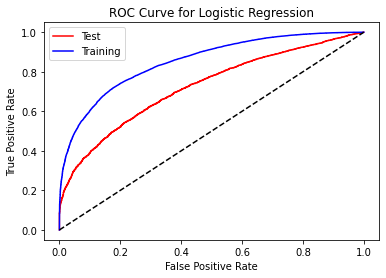

The area of curve is 0.7238810909844585


In [71]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr_test, tpr_test,h=roc_curve(y_test, lr.predict_proba(X_test)[:, 1],pos_label='Denied')
fpr_train, tpr_train,l=roc_curve(y_train, lr.predict_proba(X_train)[:, 1],pos_label='Denied')
plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.show()
print(f'\033[1mThe area of curve is {roc_auc_score(y_test,  lr.predict_proba(X_test)[:, 1])}')

> From the ROC curve we can see that the area under that is 0.723881

# Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
dt_p = Pipeline([('processing_pipeline', processing_pipeline), 
              ('DT', DecisionTreeClassifier())
             ])

params = {'DT__max_depth': [1,10,50], 'DT__min_samples_split' : [0.1, 1, 10]}

dt = GridSearchCV(dt_p, param_grid=params, scoring='f1_weighted', cv=10, refit=True)
dt = dt.fit(X_train, y_train)

print(dt.best_estimator_)
print("\n")
print(f'Validation score: {dt.best_score_:.2%}')
print(f'Test score: {dt.score(X_test, y_test):.2%}')

Pipeline(steps=[('processing_pipeline',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['Sentence (Years)',
                                                   'Decision_Year',
                                                   'Decision_Month', 'Age']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                 

> Initially, we considered max depth as 1, 10, and 50; and minimum sample split as 0.1, 1 and 10. \
> From our analysis, we got max depth as 10, and min sample split as 10.

### Secondary search 

In [74]:
dt_p = Pipeline([('processing_pipeline', processing_pipeline), 
              ('DT', DecisionTreeClassifier())
             ])

params = {'DT__max_depth': [5,10,15], 'DT__min_samples_split' : [1,10,15]}

dt = GridSearchCV(dt_p, param_grid=params, scoring='f1_weighted', cv=10, refit=True)
dt = dt.fit(X_train, y_train)

print(dt.best_estimator_)
print("\n")
print(f'Validation score: {dt.best_score_:.2%}')
print(f'Test score: {dt.score(X_test, y_test):.2%}')

Pipeline(steps=[('processing_pipeline',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['Sentence (Years)',
                                                   'Decision_Year',
                                                   'Decision_Month', 'Age']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                 

> Seeing the results from the initial analysis we are going with max depth of (5, 10, 15) and min sample split of (1, 10, 15)\
> After secondary seach we get a Max depth of 15 and minimum sample split of 10 \
> Hence printing the same with 15 as max depth and 10 as minimum sample split.

In [76]:
dt = Pipeline([('processing_pipeline', processing_pipeline),
                           ('dt', DecisionTreeClassifier(max_depth=15, min_samples_split=10))])
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)
print("Testing Scores:: Classification Report:\n")
print(classification_report(y_test, dt_predict))

Testing Scores:: Classification Report:

              precision    recall  f1-score   support

    Approved       0.49      0.18      0.26      2462
      Denied       0.82      0.95      0.88      9634

    accuracy                           0.79     12096
   macro avg       0.65      0.56      0.57     12096
weighted avg       0.75      0.79      0.75     12096



> From the testing data, with decision tree analysis, we see an accuracy of 79%.

In [89]:
Decesion_Tree = dt.predict(X_train)
print("Training Scores for DT Model: Classification Report:\n")
print(classification_report(y_train, Decesion_Tree))

Training Scores for DT Model: Classification Report:

              precision    recall  f1-score   support

    Approved       0.78      0.28      0.42      9820
      Denied       0.84      0.98      0.91     38561

    accuracy                           0.84     48381
   macro avg       0.81      0.63      0.66     48381
weighted avg       0.83      0.84      0.81     48381



> From the training data, with decision tree analysis, we see an accuracy of 84%

### ROC-AUC Curve for Decision Tree Classifier

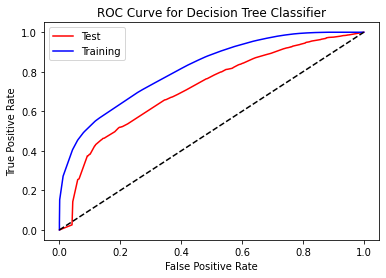

The area of curve is 0.713796457239937


In [78]:
fpr_test, tpr_test,h=roc_curve(y_test, dt.predict_proba(X_test)[:, 1],pos_label='Denied')
fpr_train, tpr_train,l=roc_curve(y_train, dt.predict_proba(X_train)[:, 1],pos_label='Denied')
plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.title('ROC Curve for Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.show()
print(f'\033[1mThe area of curve is {roc_auc_score(y_test,  dt.predict_proba(X_test)[:, 1])}')

> From the ROC curve we can see that the are under it is 0.71379 which seems reasonable. 

# Classification using K-Nearest Neighbors Classifier


In [66]:
from sklearn.neighbors import KNeighborsClassifier
pipeline_knn=Pipeline([('processing_pipeline', processing_pipeline),('knn_classifier',KNeighborsClassifier())])
param_knn = {'knn_classifier__n_neighbors':[1, 10, 50]}
KNN = GridSearchCV(estimator=pipeline_knn, param_grid=param_knn, scoring='accuracy', refit=True, cv=5)
KNN = KNN.fit(X_train, y_train)
print(f'\033[1mThis model seems to be best for classification when hyperparameter number of neighbors are {KNN.best_params_["knn_classifier__n_neighbors"]}')
y_predict = KNN.predict(X_test)
KNN.score(X_test,y_test)
print(f'\033[1mThe accuracy of KNN classifier is {KNN.score(X_test,y_test)}')

This model seems to be best for classification when hyperparameter number of neighbors are 50
The accuracy of KNN classifier is 0.7981150793650794


> Hyperparameters Used: Used 1,10,50 as number of neighbors for grid search. \
> This model seems to be best for classification when hyperparameter number of neighbors are 50

In [79]:
pipeline_knn=Pipeline([('processing_pipeline', processing_pipeline),('knn_classifier',KNeighborsClassifier())])
param_knn = {'knn_classifier__n_neighbors':[40, 50, 60]}
KNN = GridSearchCV(estimator=pipeline_knn, param_grid=param_knn, scoring='accuracy', refit=True, cv=5)
KNN = KNN.fit(X_train, y_train)
print(f'\033[1mThis model seems to be best for classification when hyperparameter number of neighbors are {KNN.best_params_["knn_classifier__n_neighbors"]}')
y_predict = KNN.predict(X_test)
KNN.score(X_test,y_test)
print(f'\033[1mThe accuracy of KNN classifier is {KNN.score(X_test,y_test)}')

This model seems to be best for classification when hyperparameter number of neighbors are 60
The accuracy of KNN classifier is 0.7980324074074074


In [93]:
KNN_report = KNN.predict(X_train)
print("Training Scores for KNN Model: Classification Report:\n")
print(classification_report(y_train, KNN_report))

Training Scores for KNN Model: Classification Report:

              precision    recall  f1-score   support

    Approved       0.66      0.04      0.08      9820
      Denied       0.80      0.99      0.89     38561

    accuracy                           0.80     48381
   macro avg       0.73      0.52      0.48     48381
weighted avg       0.77      0.80      0.72     48381



> From the initial analysis, we see that this classification is best-suited when hyperparameter numbers are in the neighbourhood of 50. So, in the secondary analysis, we considered (40,50,60). \
> The model seems to be best for classification when hyperparameter number of neighbours are 60\
> we can see an accuracy of 80% in this model which is considerably better.

## ROC-AUC Curve for KNN

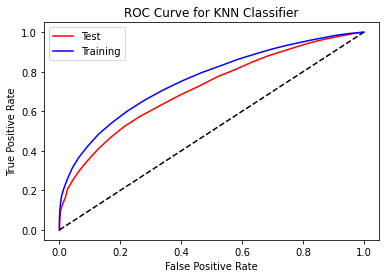

The area of curve is 0.712359692107242


In [94]:
fpr_test, tpr_test,h=roc_curve(y_test, KNN.predict_proba(X_test)[:, 1],pos_label='Denied')
fpr_train, tpr_train,l=roc_curve(y_train, KNN.predict_proba(X_train)[:, 1],pos_label='Denied')
plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.title('ROC Curve for KNN Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.show()
print(f'\033[1mThe area of curve is {roc_auc_score(y_test,  KNN.predict_proba(X_test)[:, 1])}')

> It seems like KNN is has a comparitively similar accuracy when compared with Logistic and DTC having 79% accuracy \
> Also, the area of curve for KNN has decreased to 71% fom 72% which is not too significant

# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
pipe3 = Pipeline([('processing', processing_pipeline),
             ('rf', RandomForestClassifier())])
param_grid_rf = [{'rf__max_depth': [5, 10, 15],
               'rf__n_estimators': [10, 50, 100],
               'rf__class_weight': ['balanced', 'balanced_subsample'],
               'rf__max_samples': [1000, 2000, 5000]
              }]

gcv_rf = GridSearchCV(estimator=pipe3, param_grid=param_grid_rf, scoring='recall_macro', refit=True)
gcv_rf = gcv_rf.fit(X_train, y_train)

In [50]:
ypred_rf = Pipeline([('Processing pipeline', processing_pipeline),('rf',RandomForestClassifier(class_weight='balanced', max_depth=10,max_samples=5000))])
ypred_rf = gcv_rf.predict(X_test)
print(classification_report(y_test, ypred_rf))

              precision    recall  f1-score   support

    Approved       0.32      0.55      0.41      2462
      Denied       0.86      0.71      0.78      9634

    accuracy                           0.68     12096
   macro avg       0.59      0.63      0.59     12096
weighted avg       0.75      0.68      0.70     12096



> From this model we see that the accuracy is at 68% which is comprartivly very less with regards ro logistic regression and Decesion tree. Hence this is not the correct mode that should be used on this data set for our analysis. 

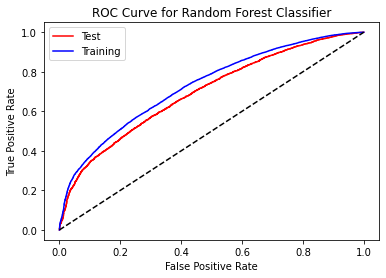

The area of curve is 0.6951372297577949


In [95]:
fpr_test, tpr_test,h=roc_curve(y_test, gcv_rf.predict_proba(X_test)[:, 1],pos_label='Denied')
fpr_train, tpr_train,l=roc_curve(y_train, gcv_rf.predict_proba(X_train)[:, 1],pos_label='Denied')
plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.title('ROC Curve for Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.show()
print(f'\033[1mThe area of curve is {roc_auc_score(y_test,  gcv_rf.predict_proba(X_test)[:, 1])}')

> With the ROC curve we can see that the area under it is 0.6951 which is less compared to other models we have seen above. 

# Conclusion 

In [91]:
logestic_regression = lr_model.predict(X_train)
print("Training Scores for LR Model: Classification Report:\n")
print(classification_report(y_train, logestic_regression))
Decesion_Tree = dt.predict(X_train)
print("Training Scores for DT Model: Classification Report:\n")
print(classification_report(y_train, Decesion_Tree))

Training Scores for LR Model: Classification Report:

              precision    recall  f1-score   support

    Approved       0.75      0.31      0.44      9820
      Denied       0.85      0.97      0.91     38561

    accuracy                           0.84     48381
   macro avg       0.80      0.64      0.67     48381
weighted avg       0.83      0.84      0.81     48381

Training Scores for DT Model: Classification Report:

              precision    recall  f1-score   support

    Approved       0.78      0.28      0.42      9820
      Denied       0.84      0.98      0.91     38561

    accuracy                           0.84     48381
   macro avg       0.81      0.63      0.66     48381
weighted avg       0.83      0.84      0.81     48381



>From the above analysis we can see that both Logistic regression and decision tree classifiers are best suited for our dateset and our target variable <br>
>When we compare KNN (K-Nearest neighbour) classifier and Random forest classifier we can see a dip in the accuracy of the model. Eventhough the drop is not huge when it comes to KNN model, there is a significant drop in accuracy when it comes to Random forest classifer.